# Analyse Correlations in the Dataset
## **A Notebook for Finding Correlations Across Demographic Categories and Income/Wage**

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mplt
import plotly.express as plt

In [24]:
correlational_df = pd.read_csv('preprocessed_data/correlational_analysis_data.csv')
correlational_df.drop(columns='Unnamed: 0', inplace=True)
correlational_df

,DIVISION,AGEP,CIT,COW,DEAR,DEYE,FER,JWMNP,MAR,SCHL,SEX,WAGP,WKHP,WKW,DIS,INDP,OC,PINCP,RAC1P,WAOB
0,Pacific,45 to 54,US Born,Private Not-For-Profit,No Hearing Difficulty,No Vision Difficulty,NaN,31 to 60 Minutes,Divorced,No HS Diploma,female,30000.0,40.0,14 to 26 Weeks,No Disability,FIN,No Children,30000.0,WHT,US State
1,Mountain,45 to 54,US Born,Private Not-For-Profit,No Hearing Difficulty,No Vision Difficulty,No Birth in Past 12 Months,Up to 30 Minutes,Never Married/Under 15,Bachelor's Degree,female,109000.0,35.0,50 to 52 Weeks,Disability,SRV,No Children,109000.0,WHT,US State
2,Pacific,55 to 64,US Born,Private For-Profit,No Hearing Difficulty,No Vision Difficulty,NaN,Up to 30 Minutes,Married,HS Diploma/Alternative,male,50000.0,40.0,50 to 52 Weeks,No Disability,MFG,No Children,50000.0,WHT,US State
3,Pacific,35 to 44,Not Citizen,NaN,No Hearing Difficulty,No Vision Difficulty,No Birth in Past 12 Months,NaN,Married,No HS Diploma,female,0.0,0.0,No Work/Under 16 Years,No Disability,NaN,No Children,0.0,WHT,Latin America
4,Mountain,45 to 54,US Born,Local Government,No Hearing Difficulty,No Vision Difficulty,NaN,Up to 30 Minutes,Married,No HS Diploma,male,36100.0,40.0,50 to 52 Weeks,No Disability,ENT,No Children,36100.0,WHT,US State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305116,East North Central,18 to 24,US Born,NaN,No Hearing Difficulty,No Vision Difficulty,NaN,NaN,Never Married/Under 15,Some College,male,0.0,0.0,No Work/Under 16 Years,No Disability,NaN,NaN,0.0,ASN,US State
305117,West North Central,Over 84,US Born,NaN,No Hearing Difficulty,No Vision Difficulty,NaN,NaN,Widowed,HS Diploma/Alternative,female,0.0,0.0,No Work/Under 16 Years,Disability,NaN,No Children,14000.0,WHT,US State
305118,South Atlantic,55 to 64,US Born,Private Not-For-Profit,No Hearing Difficulty,No Vision Difficulty,NaN,31 to 60 Minutes,Married,Master's Degree,female,100000.0,40.0,50 to 52 Weeks,No Disability,SRV,No Children,100000.0,BLK,US State
305119,West South Central,25 to 34,US Born,Private For-Profit,No Hearing Difficulty,No Vision Difficulty,NaN,Up to 30 Minutes,Never Married/Under 15,HS Diploma/Alternative,male,13700.0,40.0,50 to 52 Weeks,No Disability,SRV,No Children,13700.0,WHT,US State


In [4]:
regression_df = pd.read_csv('preprocessed_data/regression_data.csv')
regression_df.drop(columns='Unnamed: 0', inplace=True)

KeyboardInterrupt: 

In [ ]:
correlation_matrix = regression_df.corr()
#Correlation with output variable
cor_target = abs(correlation_matrix["PINCP"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

In [ ]:
k = 20
  
cols = correlation_matrix.nlargest(k, 'PINCP')['PINCP'].index 
  
cm = np.corrcoef(regression_df[cols].values.T) 
f, ax = mplt.subplots(figsize =(12, 5)) 
  
ax = sns.heatmap(cm,
                 xticklabels= cols.values , yticklabels= cols.values, 
                 cmap='coolwarm',annot=True,linewidth=0, vmin=-1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
def describe_data(data, IV, DV):
    descriptives = data.groupby(IV).agg(["count",'mean','std','sem'])
    return descriptives[DV]
descriptives_race = describe_data(correlational_df, "RAC1P", "PINCP")
descriptives_intersection = describe_data(correlational_df, ["SCHL",'SEX'], "PINCP")
describe_data(correlational_df, ['RAC1P',"DEAR",'DEYE'], "PINCP")

count          mean  \
RAC1P DEAR                  DEYE                                         
AI    Hearing Difficulty    No Vision Difficulty     101  27294.950495   
                            Vision Difficulty         43  15617.209302   
      No Hearing Difficulty No Vision Difficulty    2371  18666.356390   
                            Vision Difficulty         76  17515.000000   
AIAN  Hearing Difficulty    No Vision Difficulty      13  31389.230769   
                            Vision Difficulty         11  19340.000000   
      No Hearing Difficulty No Vision Difficulty     352  17571.818182   
                            Vision Difficulty         10  22865.000000   
AN    Hearing Difficulty    No Vision Difficulty      12  18181.666667   
                            Vision Difficulty          1  23500.000000   
      No Hearing Difficulty No Vision Difficulty     206  13361.553398   
                            Vision Difficulty          9   9800.000000   
ASN   Hearing Difficulty    No Vision Difficulty     238  30349.974790   
                            Vision Difficulty         29  12609.655172   
      No Hearing Difficulty No Vision Difficulty   14997  38561.569847   
                            Vision Difficulty        148  26370.000000   
BLK   Hearing Difficulty    No Vision Difficulty     642  23260.707165   
                            Vision Difficulty        261  16473.716475   
      No Hearing Difficulty No Vision Difficulty   30929  21434.090627   
                            Vision Difficulty        937  17155.915688   
MULT  Hearing Difficulty    No Vision Difficulty     185  28377.837838   
                            Vision Difficulty         54  14677.592593   
      No Hearing Difficulty No Vision Difficulty    8479  19304.182451   
                            Vision Difficulty        154  18866.961039   
NHPI  Hearing Difficulty    No Vision Difficulty       8  27400.000000   
                            Vision Difficulty          2  27500.000000   
      No Hearing Difficulty No Vision Difficulty     419  22582.362768   
                            Vision Difficulty         12  16300.000000   
Other Hearing Difficulty    No Vision Difficulty     147  15746.394558   
                            Vision Difficulty         55  15952.981818   
      No Hearing Difficulty No Vision Difficulty   10603  18098.257380   
                            Vision Difficulty        171  12942.222222   
WHT   Hearing Difficulty    No Vision Difficulty    9221  36707.279145   
                            Vision Difficulty       2059  21685.747450   
      No Hearing Difficulty No Vision Difficulty  218202  36135.573478   
                            Vision Difficulty       3964  25700.332997   

                                                           std           sem  
RAC1P DEAR                  DEYE                                              
AI    Hearing Difficulty    No Vision Difficulty  34987.138312   3481.350380  
                            Vision Difficulty     13577.041252   2070.479380  
      No Hearing Difficulty No Vision Difficulty  37385.652067    767.784222  
                            Vision Difficulty     42346.126671   4857.433863  
AIAN  Hearing Difficulty    No Vision Difficulty  22457.608385   6228.619889  
                            Vision Difficulty     12063.813659   3637.376677  
      No Hearing Difficulty No Vision Difficulty  25753.825187   1372.683495  
                            Vision Difficulty     46901.706022  14831.621718  
AN    Hearing Difficulty    No Vision Difficulty  16464.974855   4753.028832  
                            Vision Difficulty              NaN           NaN  
      No Hearing Difficulty No Vision Difficulty  24634.535772   1716.369436  
                            Vision Difficulty     11495.760088   3831.920029  
ASN   Hearing Difficulty    No Vision Difficulty  64745.000547   4196.795044  
                            Vision Difficulty     132

In [22]:
def visualize_descriptives(data,IV):
    #everytime you use this, change your x and your data...
    data.reset_index(inplace=True)
    graph = plt.bar(data, x = IV, y = "mean", error_x = "sem", error_y = "sem", template='none', width=500, 
                labels = {"mean": "Income", IV: IV}) 
    
    graph.update_traces(marker_color="#d3d3d3")
    graph.update_traces(marker= dict(line={"width":3,"color":"#000000"}))

    graph.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
    graph.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})


    graph.show()
    
    import plotly.express as px
    
visualize_descriptives(descriptives_race,'RAC1P')

ValueError: cannot insert level_0, already exists

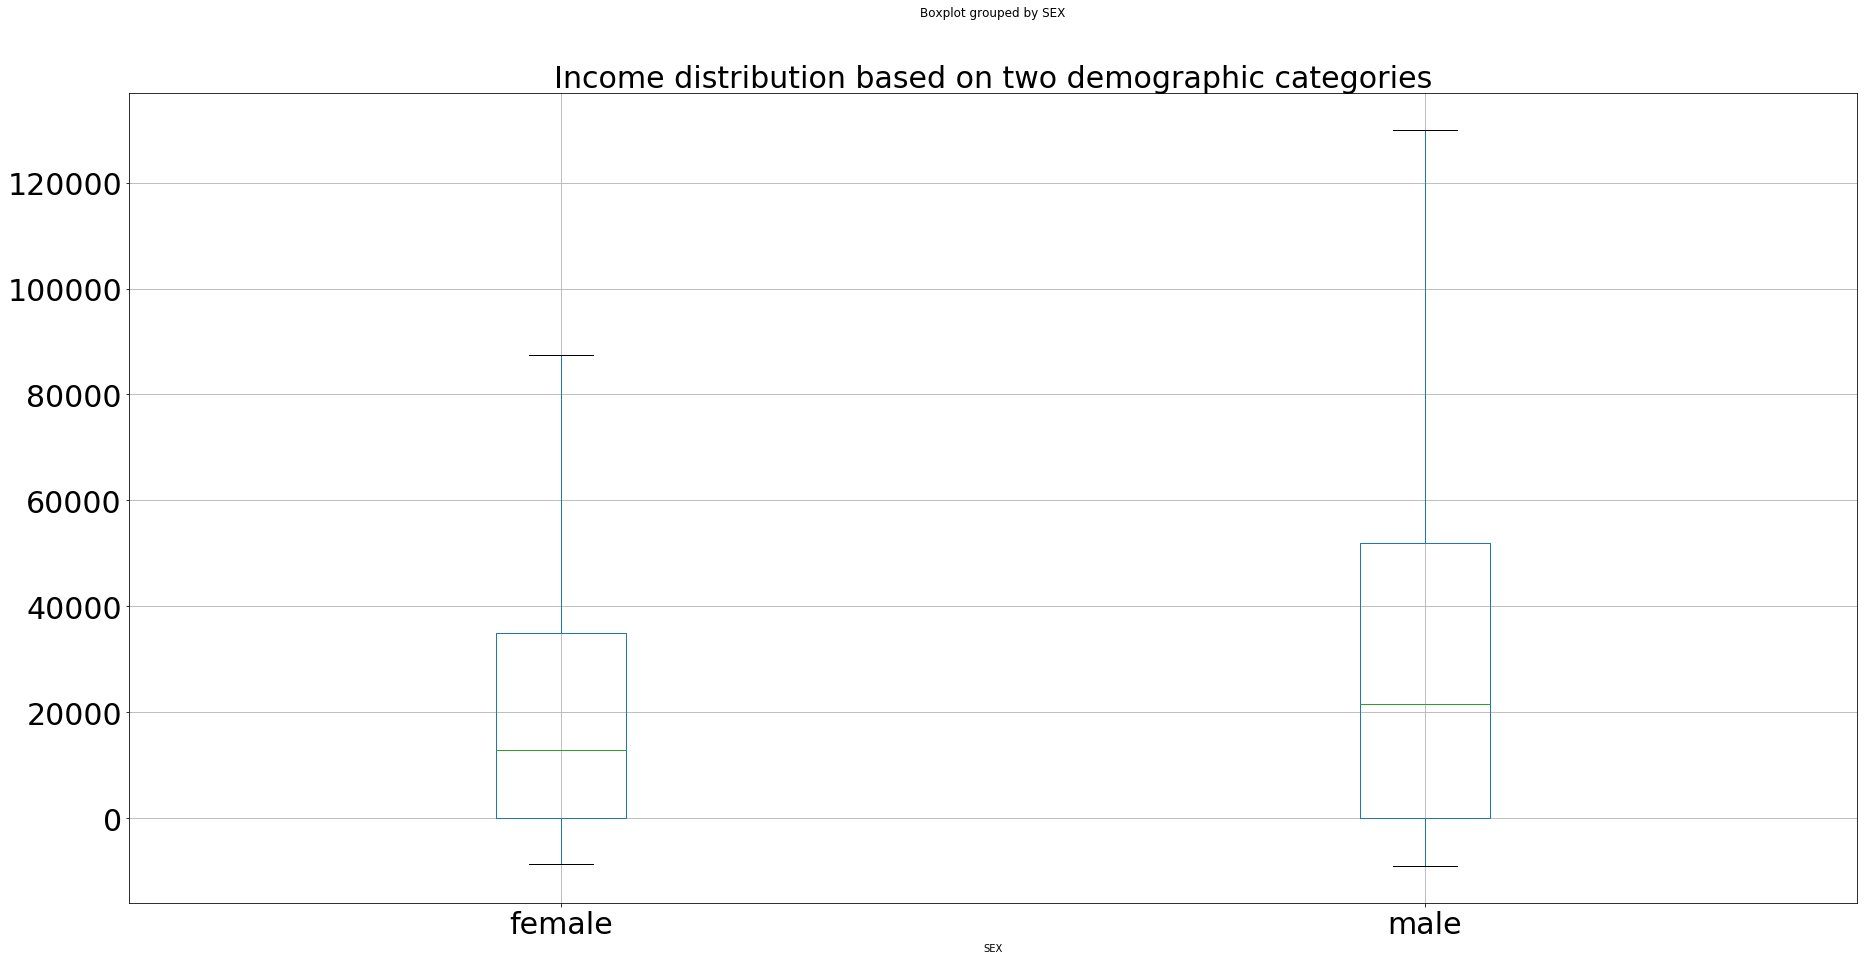

In [20]:
def visualize_descriptive(DV,IV):
    #everytime you use this, change your column and your groupby
    fig, ax = mplt.subplots(figsize=(30,15))
    fs = 30
    correlational_df.boxplot(column=DV, by=IV,ax=ax,showfliers=False,fontsize=30)
    ax.set_title('Income distribution based on two demographic categories', fontsize=fs)
visualize_descriptive('PINCP','SEX')

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
def oneway_ANOVA(data, IV, DV):
    Al_F = data[data[IV] == "Al Female"][DV]
    Al_M = data[data[IV] == "Al Male"][DV]
    AIAN_F = data[data[IV] == ""][DV]
    Al_M = data[data[IV] == "Al Male"][DV]
    results = stats.f_oneway(auto, dynamic, explicit)
    fstatistic = results[0]
    pvalue = results[1]
    df1 = len(descriptives) - 1
    df2 = (len(auto) - 1) + (len(dynamic) - 1) + (len(explicit) - 1)
    levene_results = stats.levene(auto, dynamic, explicit)
    shapiro_auto = stats.shapiro(auto)
    shapiro_dynamic = stats.shapiro(dynamic)
    shapiro_explicit = stats.shapiro(explicit)
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()
    return df1,df2,format(pvalue, '.5f'),format(fstatistic,'.2f'),levene_results,shapiro_dynamic,shapiro_explicit,shapiro_auto,print(tukey_result)

In [7]:
oneway_ANOVA(correlational_df, ['RAC1P','SEX'], ['PINCP'])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 915363